In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# 초기설정
plt.rcParams['figure.figsize']= [10, 8] #시각화 할때 얼마나 크게 보여줄건지 사이즈 결정 가로 10 세로 8
sns.set(style='whitegrid')
sns.set_palette('pastel')
warnings.filterwarnings('ignore')ㅇ

In [ ]:
# 한글이 깨지는 경우 해결방법
from matplotlib import font_manager, rc
import matplotlib
import platform
if platform.system() == 'Windows':
  # 윈도우인 경우
  font_name = font_manaver.FontProperties(fname='c:/Windows/Fonts/malgun.ttf')
  rc('font', family=font_name)
matplotlib.rcParams['axes.unicode_minus']=False

In [ ]:
# Loading'Tips' dataset from seaborn
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
tips.shape

(244, 7)

In [ ]:
# matplotlib을 활용한 시각화
sum_tip_by_day = tips.groupby('day')['tip'].sum()
sum_tip_by_day

day
Thur    171.83
Fri      51.96
Sat     260.40
Sun     247.39
Name: tip, dtype: float64

In [ ]:
x_label = ['Thu','Fri','Sat','Sun']
x_label_index = np.arange(len(x_label))
x_label_index

array([0, 1, 2, 3])

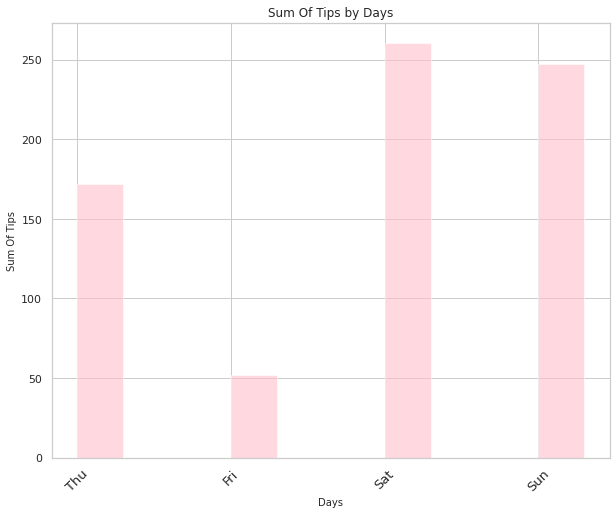

In [ ]:
# Bar 차트 이해 및 제작_비교용도로 사용
plt.bar(x_label,sum_tip_by_day,
        color='pink',
        alpha=0.6,
        width=0.3,
        align='edge') # 색, 투명도, 너비, 배치정렬
plt.title('Sum Of Tips by Days')
plt.xlabel('Days', fontsize=10)
plt.ylabel('Sum Of Tips',fontsize=10)
plt.xticks(x_label_index,
           x_label,
           rotation=45,
           fontsize=13)
plt.show()

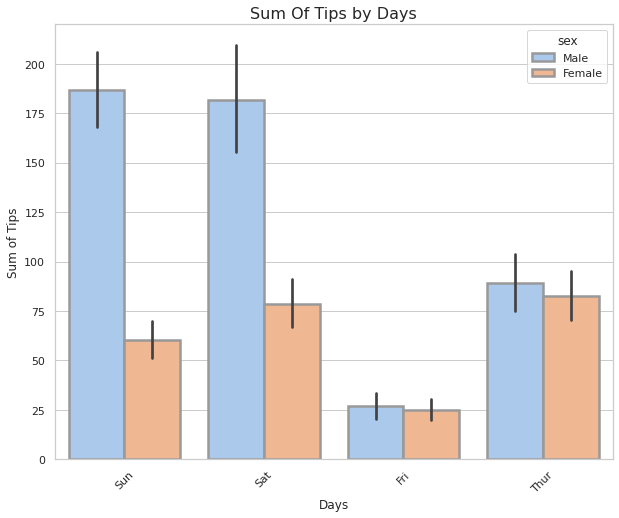

In [ ]:
# seaborn을 활용한 시각화
sns.barplot(data=tips, # 데이터프레임
            x ='day', # x 변수
            y = 'tip', # y 변수
            estimator=np.sum, # sum, median, average 등 원하는 것 지정해서 볼 수 있다.
            hue='sex', # hue : 색깔 구분으로 특정 컬럼값을  비교가능
            order=['Sun','Sat','Fri','Thur'], # 순서
            edgecolor='.6', # 바 모서리 선명도
            linewidth=2.5) # 모서리 두께
plt.title('Sum Of Tips by Days', fontsize=16)
plt.xlabel('Days')
plt.ylabel('Sum of Tips')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# pie 차트 이해 및 제작
# matplotlib을 활용한 시각화
sum_tip_by_day=tips.groupby('day')['tip'].sum()
ratio_tip_by_day = sum_tip_by_day/sum_tip_by_day.sum()

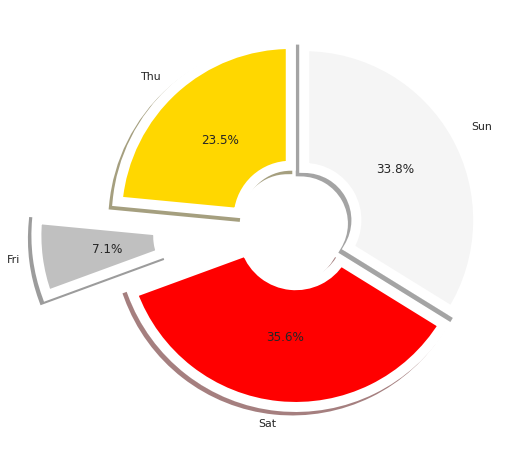

In [ ]:
x_label = ['Thu','Fri','Sat','Sun']

plt.pie(ratio_tip_by_day, # 비율값
        labels=x_label, # 라벨값
        autopct='%.1f%%',  # 부채꼴 안에 표시될 숫자 형식(.1은 소수점 1자리, f는 실수)
        startangle=90, # 축 시작 방향 설정
        counterclock=True, # 시계방향순
        explode=[0.05, 0.5, 0.05, 0.05], # 간격 표시
        shadow=True, # 그림자 여부
        colors=['gold','silver','red','whitesmoke'], # 색
        wedgeprops={'width': 0.7, 'edgecolor':'w', 'linewidth':3}, # 중간이 빈 도넛차트로 만들고, 띠 너비, 테두리 색, 테두리 너비
        )

plt.show()

In [ ]:
# line 차트 이해 및 제작
# matplotlib 활용

# 차트 예제를 위해 가상 시간 컬럼 추가하기
# 일요일 데이터만 사용
sun_tips = tips[tips['day']=='Sun']
sun_tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
186,20.90,3.50,Female,Yes,Sun,Dinner,3
187,30.46,2.00,Male,Yes,Sun,Dinner,5
188,18.15,3.50,Female,Yes,Sun,Dinner,3
189,23.10,4.00,Male,Yes,Sun,Dinner,3


In [ ]:
# 현재 서버 시간을 열기 위해 datetime 라이브러리 사용
import datetime
date=[]
today=datetime.date.today()
date.append(today)

for time in range(sun_tips.shape[0]-1):
  today +=datetime.timedelta(1) # 하루씩 추가
  date.append(today)
date

[datetime.date(2022, 1, 21),
 datetime.date(2022, 1, 22),
 datetime.date(2022, 1, 23),
 datetime.date(2022, 1, 24),
 datetime.date(2022, 1, 25),
 datetime.date(2022, 1, 26),
 datetime.date(2022, 1, 27),
 datetime.date(2022, 1, 28),
 datetime.date(2022, 1, 29),
 datetime.date(2022, 1, 30),
 datetime.date(2022, 1, 31),
 datetime.date(2022, 2, 1),
 datetime.date(2022, 2, 2),
 datetime.date(2022, 2, 3),
 datetime.date(2022, 2, 4),
 datetime.date(2022, 2, 5),
 datetime.date(2022, 2, 6),
 datetime.date(2022, 2, 7),
 datetime.date(2022, 2, 8),
 datetime.date(2022, 2, 9),
 datetime.date(2022, 2, 10),
 datetime.date(2022, 2, 11),
 datetime.date(2022, 2, 12),
 datetime.date(2022, 2, 13),
 datetime.date(2022, 2, 14),
 datetime.date(2022, 2, 15),
 datetime.date(2022, 2, 16),
 datetime.date(2022, 2, 17),
 datetime.date(2022, 2, 18),
 datetime.date(2022, 2, 19),
 datetime.date(2022, 2, 20),
 datetime.date(2022, 2, 21),
 datetime.date(2022, 2, 22),
 datetime.date(2022, 2, 23),
 datetime.date(2022, 2,

In [ ]:
sun_tips['date'] = date
sun_tips

,total_bill,tip,sex,smoker,day,time,size,date
0,16.99,1.01,Female,No,Sun,Dinner,2,2022-01-21
1,10.34,1.66,Male,No,Sun,Dinner,3,2022-01-22
2,21.01,3.50,Male,No,Sun,Dinner,3,2022-01-23
3,23.68,3.31,Male,No,Sun,Dinner,2,2022-01-24
4,24.59,3.61,Female,No,Sun,Dinner,4,2022-01-25
...,...,...,...,...,...,...,...,...
186,20.90,3.50,Female,Yes,Sun,Dinner,3,2022-04-02
187,30.46,2.00,Male,Yes,Sun,Dinner,5,2022-04-03
188,18.15,3.50,Female,Yes,Sun,Dinner,3,2022-04-04
189,23.10,4.00,Male,Yes,Sun,Dinner,3,2022-04-05


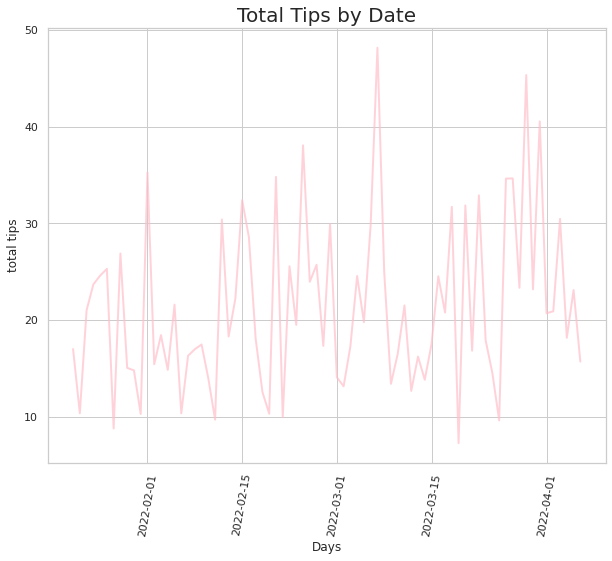

In [ ]:
# line chart

plt.plot(sun_tips['date'],sun_tips['total_bill'],
         linestyle='-',
         linewidth=2,
         color='pink',
         alpha=0.7)
plt.title('Total Tips by Date', fontsize=20)
plt.xlabel('Days')
plt.ylabel('total tips')
plt.xticks(rotation=80)
plt.show()


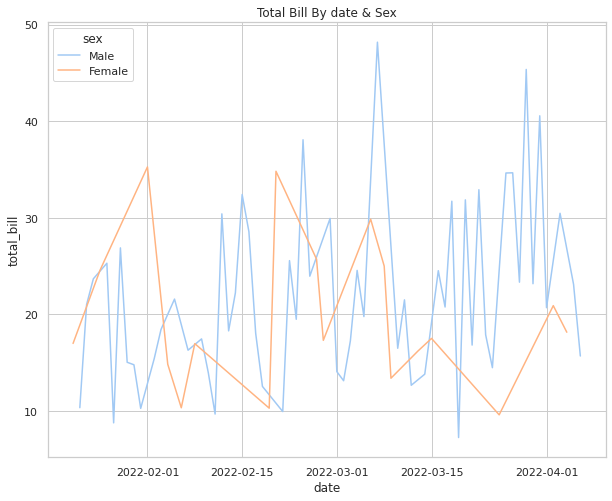

In [ ]:
# seabon 활용
sns.lineplot(data=sun_tips,
             x='date',
             y='total_bill',
             hue='sex',
             )
plt.title('Total Bill By date & Sex')
plt.show()

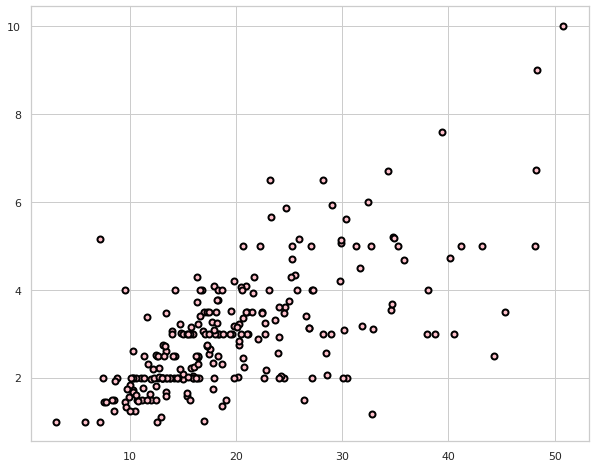

In [ ]:
# Scatter 차트이해 및 제작

# 변수간의 상관관계를 나타낼때 많이 사용

# matplotlib 사용
plt.scatter(tips['total_bill'],tips['tip'],
            color='pink',
            edgecolor='black',
            linewidth=2)
plt.show()

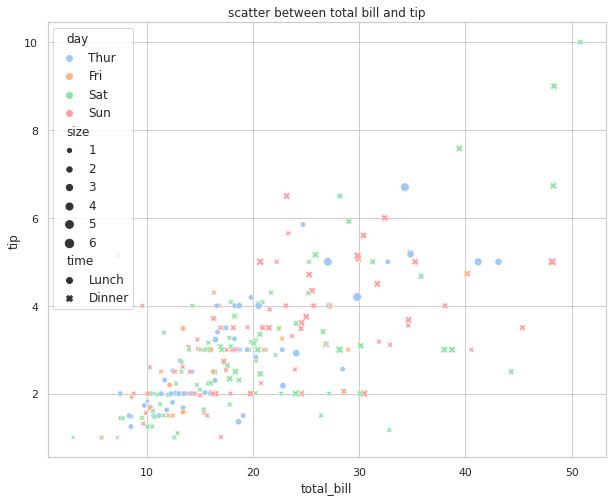

In [ ]:
# seaborn 사용
sns.scatterplot(data=tips,
                x='total_bill',
                y='tip',
                style='time', # 모양 구분으로 다른 변수와 비교
                hue='day', # 색깔 구분으로 다른 변수와 비교
                size='size', # 크기 구분으로 다른 변수와 비교
                )

plt.title('scatter between total bill and tip')
plt.show()
#겹치면 figuresize 늘리던지 하면 됨.

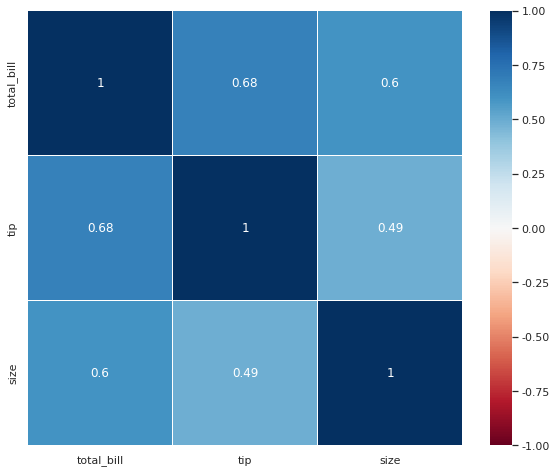

In [ ]:
# heat map 차트 이해 및 제작
# seaborn을 활용한 시각화
# 변수간의 상관관계, 연속형 변수에 대해서 구할 수 있음, 1은 양의 상관관계, -1은 음의 상관관계, 단 0은 상관관계가 없다고 해석해버리면 안된다.
sns.heatmap(tips.corr(),
            annot=True,  # corr값 표시
            square=True, # 정사각형
            vmin=-1, vmax=1, # 최소 최대값 지정
            linewidth=.5, # 라인두께
            cmap='RdBu', # 색깔 테마
            )
plt.show()

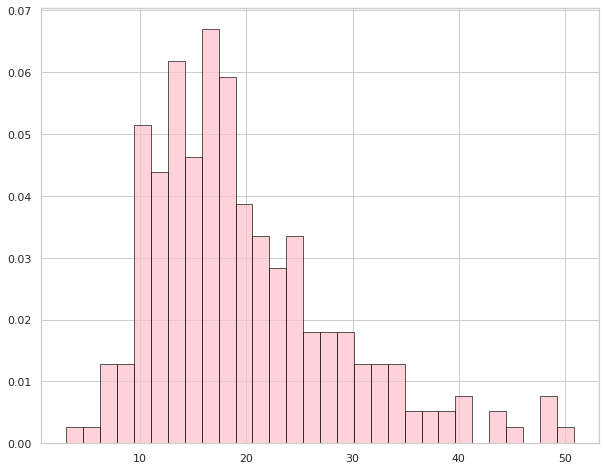

In [ ]:
# histogram 차트 이해 및 제작 # 변수 분포를 알아볼때 사용.
# mtplotlib을 활용한 시각화

plt.hist(tips['total_bill'],
         bins=30,
         density=True, # 비율적으로 나타냄
         alpha=0.7,
         color='pink',
         edgecolor='black',
         linewidth=0.9)
# plt.title, xlabel, ylabel도 표현해주자.
plt.show()

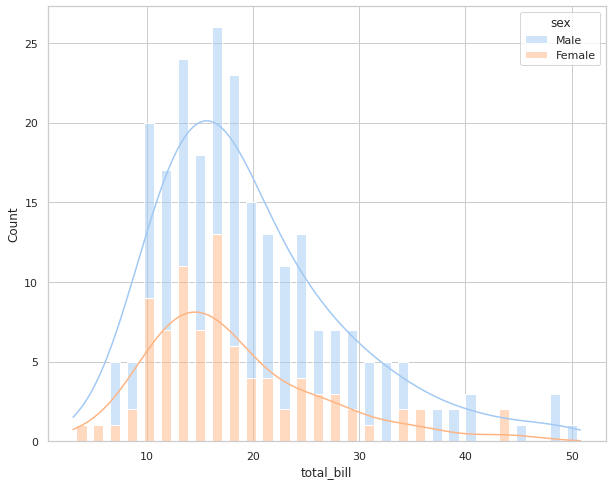

In [ ]:
# seaborn 활용

sns.histplot(data=tips,
             x='total_bill',
             bins=30,
             kde=True, # kernal density estimator
             hue='sex',
             multiple='stack', # 겹치지 않고 데이터 쌓아서 표현하는 방법.
             shrink=0.6 # bin의 두께
             )
plt.show()

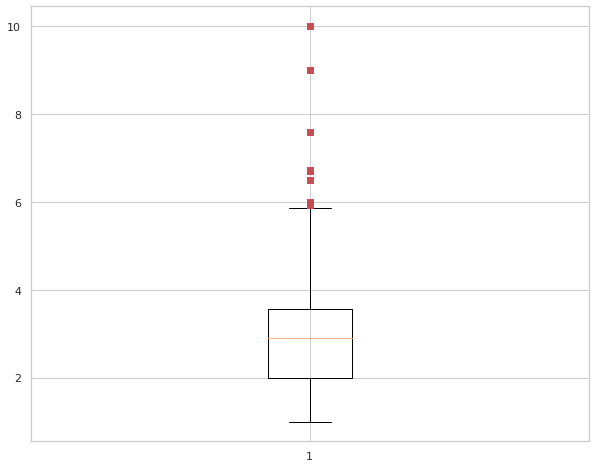

In [ ]:
# box 차트 이해 및 제작

#matplotlib 활용
plt.boxplot(tips['tip'],
            sym='rs' # outlier들을 red square로 표시
            )
plt.show()

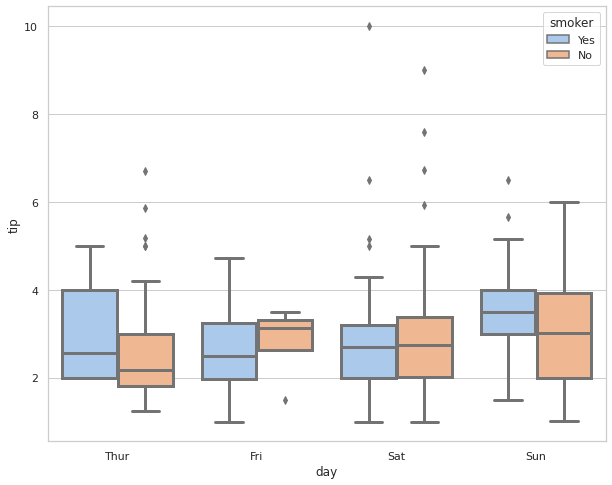

In [ ]:
#seaborn 활용
sns.boxplot(data=tips,
            x='day',
            y='tip',
            hue='smoker',
            linewidth=3,
            )
plt.show()